# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [7]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Import the libraries you will be using for analysis

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [13]:
# Try loading one file
file_path = r"C:\Users\aa_la\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records"
df_sample = pd.read_parquet(file_path + r"\2023-1.parquet")
df_sample.info(show_counts=True)
df_sample.shape

# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               3041714 non-null  int64         
 1   tpep_pickup_datetime   3041714 non-null  datetime64[us]
 2   tpep_dropoff_datetime  3041714 non-null  datetime64[us]
 3   passenger_count        2970028 non-null  float64       
 4   trip_distance          3041714 non-null  float64       
 5   RatecodeID             2970028 non-null  float64       
 6   store_and_fwd_flag     2970028 non-null  object        
 7   PULocationID           3041714 non-null  int64         
 8   DOLocationID           3041714 non-null  int64         
 9   payment_type           3041714 non-null  int64         
 10  fare_amount            3041714 non-null  float64       
 11  extra                  3041714 non-null  float64       
 12  mta_tax                3041714 no

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [55]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\Users\aa_la\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df_final = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_currentFile = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        df_currentFile['date'] = df_currentFile['tpep_pickup_datetime'].dt.date
        df_currentFile['hour'] = df_currentFile['tpep_pickup_datetime'].dt.hour
        # Loop through dates and then loop through every hour of each date
        for date in df_currentFile['date'].unique():
            dailyData = df_currentFile[df_currentFile['date']==date] 
            # Iterate through each hour of the selected date
            for hour in dailyData['hour'].unique():
                hourData = dailyData[dailyData['hour']==hour]
                # Sample 5% of the hourly data randomly
                sample = hourData.sample(frac=0.05, random_state=42)  # Take 5% sample
                sampled_data = pd.concat([sampled_data, sample])
                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df_final = pd.concat([df_final,sampled_data])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
df_final.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2698522
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1896400 non-null  int64         
 1   tpep_pickup_datetime   1896400 non-null  datetime64[us]
 2   tpep_dropoff_datetime  1896400 non-null  datetime64[us]
 3   passenger_count        1831526 non-null  float64       
 4   trip_distance          1896400 non-null  float64       
 5   RatecodeID             1831526 non-null  float64       
 6   store_and_fwd_flag     1831526 non-null  object        
 7   PULocationID           1896400 non-null  int64         
 8   DOLocationID           1896400 non-null  int64         
 9   payment_type           1896400 non-null  int64         
 10  fare_amount            1896400 non-null  float64       
 11  extra                  1896400 non-null  float64       
 12  mta_tax                1896400 

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [61]:
# Store the df in csv/parquet
# df.to_parquet('')
df_final.to_parquet("sampled_trip_records.parquet", index=False)
df_final.to_csv("sampled_trip_records.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [15]:
# Load the new data file
import os

# Select the folder having data files
os.chdir(r"C:\Users\aa_la\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")
df = pd.read_parquet("sampled_trip_records.parquet") 

In [17]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [19]:
# df.info()
df.info()
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [23]:
# Fix the index and drop any columns that are not needed


df = df.drop(columns=["store_and_fwd_flag","extra","mta_tax","improvement_surcharge","date","hour"])

df = df.set_index('tpep_pickup_datetime')




**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [26]:
# Combine the two airport fee columns

df[['airport_fee', 'Airport_fee']].isna().sum()
df['airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])
df.head(10)
df = df.drop(columns="Airport_fee")


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [29]:
# check where values of fare amount are negative

df[df['fare_amount'] == 0]

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2023-01-01 19:16:54          1   2023-01-01 19:17:15              1.0   
2023-01-02 13:44:07          1   2023-01-02 13:48:36              0.0   
2023-01-02 05:12:19          2   2023-01-02 05:41:45              1.0   
2023-01-03 08:27:38          2   2023-01-03 08:59:16              1.0   
2023-01-03 14:24:45          2   2023-01-03 14:25:14              1.0   
...                        ...                   ...              ...   
2023-09-28 13:50:44          2   2023-09-28 13:50:44              1.0   
2023-09-29 11:12:42          1   2023-09-29 11:12:42              1.0   
2023-09-29 16:12:01          1   2023-09-29 16:13:12              1.0   
2023-09-30 13:22:42          1   2023-09-30 13:33:41              1.0   
2023-09-30 16:35:07          2   2023-09-30 16:35:13              1.0   

                      trip_distance  RatecodeID  PULocationID  DOLocationID  \
tpep_pickup_datetime                                                          
2023-01-01 19:16:54            0.00         2.0           261           261   
2023-01-02 13:44:07            0.00         1.0           145           145   
2023-01-02 05:12:19           17.07         3.0           142             1   
2023-01-03 08:27:38            8.34         1.0           161           244   
2023-01-03 14:24:45            0.00         2.0           132           132   
...                             ...         ...           ...           ...   
2023-09-28 13:50:44            0.00        99.0           233           233   
2023-09-29 11:12:42            0.00         5.0           128           264   
2023-09-29 16:12:01            0.00         1.0           237           237   
2023-09-30 13:22:42            2.00         5.0           142            48   
2023-09-30 16:35:07            0.00         5.0           141           141   

                      payment_type  fare_amount  tip_amount  tolls_amount  \
tpep_pickup_datetime                                                        
2023-01-01 19:16:54              3          0.0         0.0           0.0   
2023-01-02 13:44:07              1          0.0         0.0           0.0   
2023-01-02 05:12:19              2          0.0         0.0           0.0   
2023-01-03 08:27:38              2          0.0         0.0           0.0   
2023-01-03 14:24:45              2          0.0         0.0           0.0   
...                            ...          ...         ...           ...   
2023-09-28 13:50:44              2          0.0        14.2           0.0   
2023-09-29 11:12:42              2          0.0         0.0           0.0   
2023-09-29 16:12:01              3          0.0         0.0           0.0   
2023-09-30 13:22:42              3          0.0         0.0           0.0   
2023-09-30 16:35:07              2          0.0         0.0           0.0   

                      total_amount  congestion_surcharge  airport_fee  
tpep_pickup_datetime                                                   
2023-01-01 19:16:54           0.00                   0.0         0.00  
2023-01-02 13:44:07           0.00                   0.0         0.00  
2023-01-02 05:12:19          -1.00                   0.0         0.00  
2023-01-03 08:27:38           4.00                   2.5         0.00  
2023-01-03 14:24:45          -5.25                  -2.5        -1.25  
...                            ...                   ...          ...  
2023-09-28 13:50:44          18.20                   2.5         0.00  
2023-09-29 11:12:42           0.00                   0.0         0.00  
2023-09-29 16:12:01           0.00                   0.0         0.00  
2023-09-30 13:22:42           1.00                   0.0         0.00  
2023-09-30 16:35:07          -3.50                  -2.5         0.00  

[651 rows x 14 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [32]:
# Analyse RatecodeID for the negative fare amounts
df = df.drop_duplicates()
df.info()
## there are no negative fare amounts but zero is existent it's not trivial to do anything about it

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1896400 entries, 2023-01-01 00:07:18 to 2023-09-30 22:03:22
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_dropoff_datetime  datetime64[us]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   tip_amount             float64       
 10  tolls_amount           float64       
 11  total_amount           float64       
 12  congestion_surcharge   float64       
 13  airport_fee            float64       
dtypes: datetime64[us](1), float64(9), int64(4)
memory usage: 217.0 MB


In [33]:
# Find which columns have negative values

numCols = df.select_dtypes(include=['number']).columns

negData = df[numCols].columns[(df[numCols] < 0).any()]
print(negData)
negCols = negData.tolist()
print("Columns having -ve values are:", negCols)
negRows = df[df[negCols].lt(0).any(axis=1)]

print(negRows)

Index(['total_amount', 'congestion_surcharge', 'airport_fee'], dtype='object')
Columns having -ve values are: ['total_amount', 'congestion_surcharge', 'airport_fee']
                      VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2023-01-02 05:12:19          2   2023-01-02 05:41:45              1.0   
2023-01-03 14:24:45          2   2023-01-03 14:25:14              1.0   
2023-01-17 15:03:44          2   2023-01-17 15:36:28              1.0   
2023-01-17 12:37:35          2   2023-01-17 13:24:00              1.0   
2023-01-19 09:50:26          2   2023-01-19 09:58:13              1.0   
...                        ...                   ...              ...   
2023-07-27 17:56:27          2   2023-07-27 18:00:12              1.0   
2023-07-29 03:47:56          2   2023-07-29 03:48:34              4.0   
2023-09-02 18:29:48          2   2023-09-02 18:30:13              3.0   
2023-09-05 15:32:01          2 

In [34]:
# fix these negative values
negRows['payment_type'].value_counts()
## since majority of the negative values in total_amount is due to cash payment which is not possible setting the total_amount as 0 for such 
## relative payment_type is also negligible so setting them as zero as well
df[negCols] = df[negCols].mask(df[negCols] < 0, 0)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
# Find the proportion of missing values in each column
df.isnull().sum()



VendorID                     0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
tip_amount                   0
tolls_amount                 0
total_amount                 0
congestion_surcharge     64874
airport_fee              64874
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [43]:
# Display the rows with null values
nullRows = df[df.isnull().any(axis=1)]

# Impute NaN values in 'passenger_count'
med = df["passenger_count"].median()
print(med)
df["passenger_count"]=df["passenger_count"].fillna(med)
df['passenger_count'].value_counts()

1.0


passenger_count
1.0    1442098
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [47]:
# Fix missing values in 'RatecodeID'
mode = df["RatecodeID"].mode()[0]
print(mode)
df['RatecodeID'].replace(99.0, 1)
df["RatecodeID"] = df["RatecodeID"].fillna(mode)


1.0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [50]:
# handle null values in congestion_surcharge
med1 = df["congestion_surcharge"].median()
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(med1)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [53]:
# Handle any remaining missing values
med2 = df["airport_fee"].median()
df["airport_fee"] = df["airport_fee"].fillna(med2)
df.isnull().sum()

VendorID                 0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

In [56]:
df['passenger_count'].value_counts()

passenger_count
1.0    1442098
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

Before we start fixing outliers, let's perform outlier analysis.

In [59]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
num_Cols = ["trip_distance",  "fare_amount", "tip_amount", "tolls_amount", "total_amount"]
outlierSummary={}
outlierBounds={}
for col in num_Cols :
    Q1 = float(df[col].quantile(0.25))
    Q3 = float(df[col].quantile(0.75))
    IQR = Q3  - Q1
    lower_bd = float(Q1 - 1.5 * IQR)
    upper_bd = float(Q3 + 1.5 * IQR)
    outlier_count = df[(df[col] < lower_bd) | (df[col] > upper_bd)].shape[0]
    outlierSummary[col] = {"Lower bound": lower_bd, "Upper bound": upper_bd, "Outliers": outlier_count}
    outlierBounds[col] = (lower_bd, upper_bd)

outlierSummary
outlierBounds


{'trip_distance': (-2.4749999999999996, 6.924999999999999),
 'fare_amount': (-9.599999999999998, 40.8),
 'tip_amount': (-4.13, 9.55),
 'tolls_amount': (0.0, 0.0),
 'total_amount': (-6.509999999999998, 53.41)}

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [64]:
# remove passenger_count > 6

df = df[df["passenger_count"] <= 7]
df['passenger_count'].value_counts()



passenger_count
1.0    1442098
2.0     277298
3.0      69034
4.0      38537
0.0      29681
5.0      23871
6.0      15860
7.0          5
Name: count, dtype: int64

In [66]:
# Continue with outlier handling
df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))]
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]
df = df[df["trip_distance"] <= 250]
df = df[df["payment_type"] != 0]

for col in num_Cols:
    lower, upper = outlierBounds[col]
    df[col] = df[col].apply(lambda x: lower if x < lower else (upper if x > upper else x))
df.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2023-01-01 00:07:18          2   2023-01-01 00:23:15              1.0   
2023-01-01 00:16:41          2   2023-01-01 00:21:46              2.0   
2023-01-01 00:14:03          2   2023-01-01 00:24:36              3.0   
2023-01-01 00:24:30          2   2023-01-01 00:29:55              1.0   
2023-01-01 00:42:56          1   2023-01-01 01:16:33              2.0   

                      trip_distance  RatecodeID  PULocationID  DOLocationID  \
tpep_pickup_datetime                                                          
2023-01-01 00:07:18           6.925         1.0           138           256   
2023-01-01 00:16:41           1.240         1.0           161           237   
2023-01-01 00:14:03           1.440         1.0           237           141   
2023-01-01 00:24:30           0.540         1.0           143           142   
2023-01-01 00:42:56           6.925         1.0           246            37   

                      payment_type  fare_amount  tip_amount  tolls_amount  \
tpep_pickup_datetime                                                        
2023-01-01 00:07:18              2         32.4        0.00           0.0   
2023-01-01 00:16:41              1          7.9        2.58           0.0   
2023-01-01 00:14:03              2         11.4        0.00           0.0   
2023-01-01 00:24:30              2          6.5        0.00           0.0   
2023-01-01 00:42:56              1         34.5        7.90           0.0   

                      total_amount  congestion_surcharge  airport_fee  
tpep_pickup_datetime                                                   
2023-01-01 00:07:18          41.15                   0.0         1.25  
2023-01-01 00:16:41          15.48                   2.5         0.00  
2023-01-01 00:14:03          16.40                   2.5         0.00  
2023-01-01 00:24:30          11.50                   2.5         0.00  
2023-01-01 00:42:56          47.40                   2.5         0.00

In [67]:
# Do any columns need standardising?

##with standardising i'm getting negative values and NAN values populated so Omitting that


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [71]:
df.columns.tolist()
df.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2023-01-01 00:07:18          2   2023-01-01 00:23:15              1.0   
2023-01-01 00:16:41          2   2023-01-01 00:21:46              2.0   
2023-01-01 00:14:03          2   2023-01-01 00:24:36              3.0   
2023-01-01 00:24:30          2   2023-01-01 00:29:55              1.0   
2023-01-01 00:42:56          1   2023-01-01 01:16:33              2.0   

                      trip_distance  RatecodeID  PULocationID  DOLocationID  \
tpep_pickup_datetime                                                          
2023-01-01 00:07:18           6.925         1.0           138           256   
2023-01-01 00:16:41           1.240         1.0           161           237   
2023-01-01 00:14:03           1.440         1.0           237           141   
2023-01-01 00:24:30           0.540         1.0           143           142   
2023-01-01 00:42:56           6.925         1.0           246            37   

                      payment_type  fare_amount  tip_amount  tolls_amount  \
tpep_pickup_datetime                                                        
2023-01-01 00:07:18              2         32.4        0.00           0.0   
2023-01-01 00:16:41              1          7.9        2.58           0.0   
2023-01-01 00:14:03              2         11.4        0.00           0.0   
2023-01-01 00:24:30              2          6.5        0.00           0.0   
2023-01-01 00:42:56              1         34.5        7.90           0.0   

                      total_amount  congestion_surcharge  airport_fee  
tpep_pickup_datetime                                                   
2023-01-01 00:07:18          41.15                   0.0         1.25  
2023-01-01 00:16:41          15.48                   2.5         0.00  
2023-01-01 00:14:03          16.40                   2.5         0.00  
2023-01-01 00:24:30          11.50                   2.5         0.00  
2023-01-01 00:42:56          47.40                   2.5         0.00

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical Variable
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`: Numerical Variable
* `trip_distance`: Numerical Variable
* `RatecodeID`: Categorical Variable
* `PULocationID`: Categorical Variable
* `DOLocationID`: Categorical Variable
* `payment_type`: Categorical Variable
* `pickup_hour`: Numerical Variable
* `trip_duration`: Numerical Variable


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` - Numerical
* `extra` - Numerical
* `mta_tax`- Numerical
* `tip_amount`- Numerical
* `tolls_amount`- Numerical
* `improvement_surcharge`- Numerical
* `total_amount`- Numerical
* `congestion_surcharge`- Numerical
* `airport_fee`- Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

pickup_hour
0      51164
1      34278
2      22552
3      14710
4       9436
5      10021
6      24468
7      48990
8      68279
9      78290
10     85629
11     93037
12    101004
13    104107
14    111576
15    114301
16    114290
17    123564
18    129190
19    115920
20    103435
21    103167
22     95160
23     74828
dtype: int64


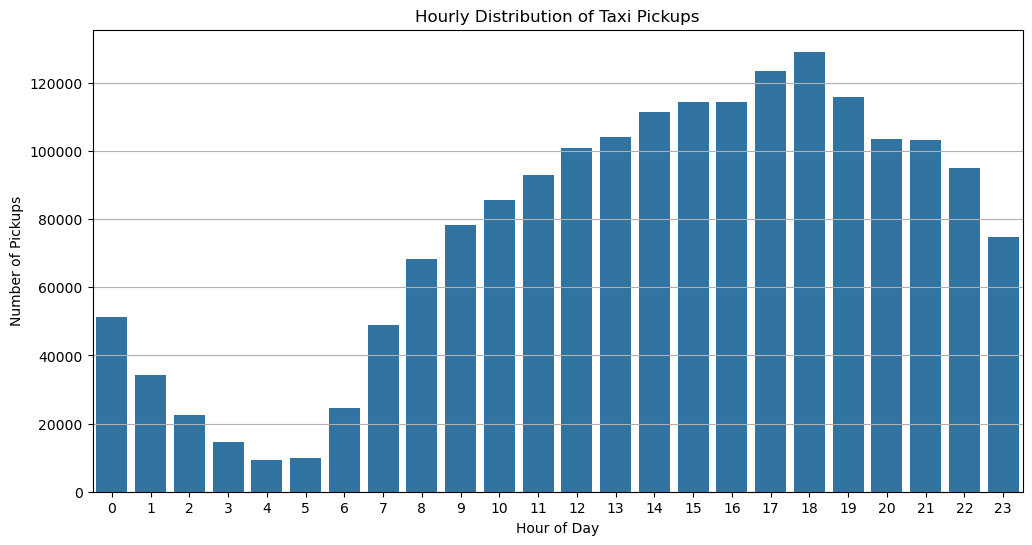

pickup_day
3    287265
2    281563
4    271620
1    265938
5    265857
6    230193
0    228960
Name: count, dtype: int64

In [77]:


df['pickup_hour'] = pd.to_datetime(df.index).hour
df['pickup_day'] = pd.to_datetime(df.index).dayofweek
df['pickup_month'] = pd.to_datetime(df.index).month
houryPicks = df.groupby('pickup_hour').size()
print(houryPicks)
df.head()
plt.figure(figsize=(12, 6))
sns.barplot(x=houryPicks.index, y=houryPicks.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xticks(range(24))  
plt.grid(axis='y')
plt.show()
df["pickup_day"].value_counts()



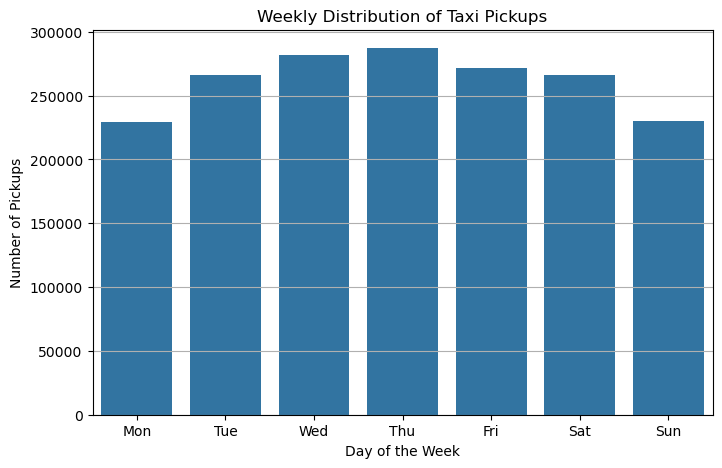

In [79]:
# Find and show the daily trends in taxi pickups (days of the week)
weeklyPicks = df.groupby('pickup_day').size()
plt.figure(figsize=(8, 5))
sns.barplot(x=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
            y=weeklyPicks.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Weekly Distribution of Taxi Pickups')
plt.grid(axis='y')
plt.show()


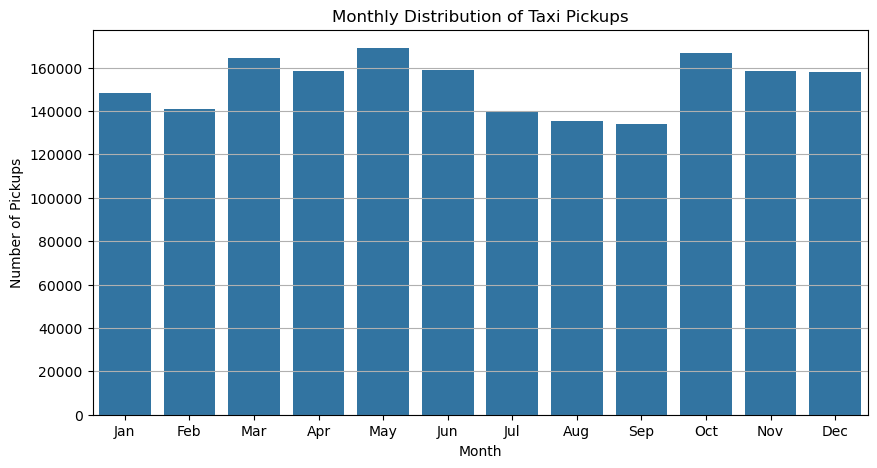

In [81]:
# Show the monthly trends in pickups
monthlyPicks = df.groupby('pickup_month').size()
plt.figure(figsize=(10, 5))
sns.barplot(x=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
            y=monthlyPicks.values)
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Distribution of Taxi Pickups')
plt.grid(axis='y')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [85]:
# Analyse the above parameters
zeroVals = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].le(0).sum()
print(zeroVals)

negVals = df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].lt(0).sum()
print(negVals)


fare_amount         575
tip_amount       410237
total_amount        329
trip_distance     22930
dtype: int64
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [89]:
# Create a df with non zero entries for the selected parameters.
df_nonzero = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

print(df_nonzero.head())


                      VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2023-01-01 00:16:41          2   2023-01-01 00:21:46              2.0   
2023-01-01 00:42:56          1   2023-01-01 01:16:33              2.0   
2023-01-01 00:58:00          2   2023-01-01 01:08:31              2.0   
2023-01-01 00:16:06          2   2023-01-01 00:31:59              1.0   
2023-01-01 00:44:09          2   2023-01-01 01:01:17              1.0   

                      trip_distance  RatecodeID  PULocationID  DOLocationID  \
tpep_pickup_datetime                                                          
2023-01-01 00:16:41           1.240         1.0           161           237   
2023-01-01 00:42:56           6.925         1.0           246            37   
2023-01-01 00:58:00           1.590         1.0            79           164   
2023-01-01 00:16:06           3.160         1.0            79           256   
2023-01-01 00:

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

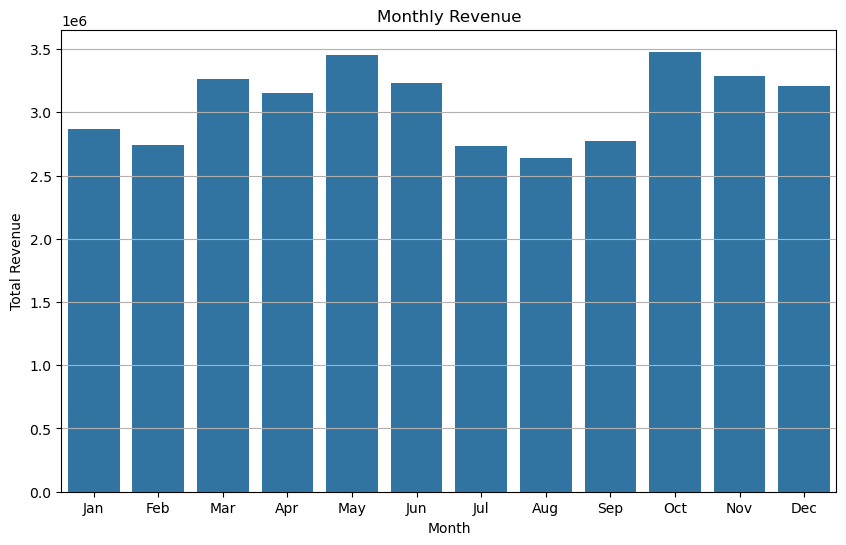

In [92]:
# Group data by month and analyse monthly revenue
monthlyRvn = df_nonzero.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthlyRvn.index, y=monthlyRvn.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

quarter
Q1    8874644.05
Q2    9838582.21
Q3    8146846.76
Q4    9975895.65
Name: total_amount, dtype: float64
36835968.669999994


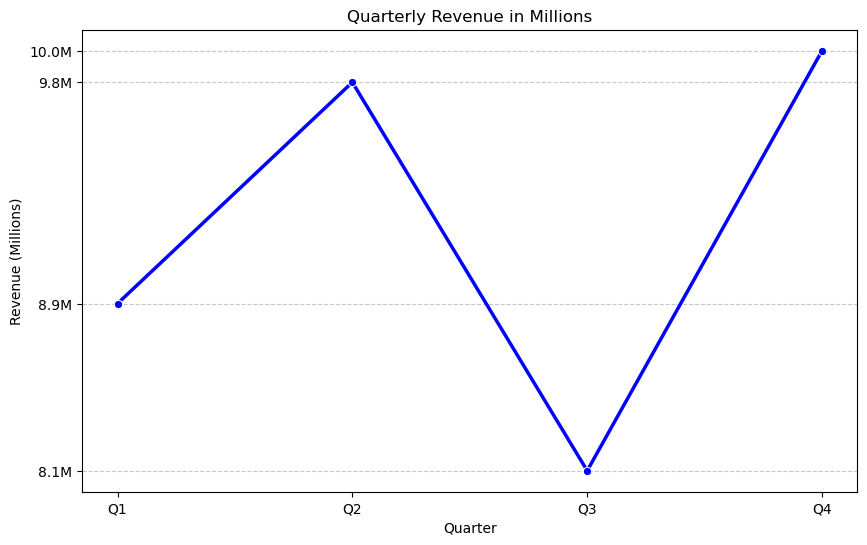

In [95]:
    # Calculate proportion of each quarter
quarterlyyap = {1: 'Q1', 2: 'Q1', 3: 'Q1', 
           4: 'Q2', 5: 'Q2', 6: 'Q2', 
           7: 'Q3', 8: 'Q3', 9: 'Q3', 
           10: 'Q4', 11: 'Q4', 12: 'Q4'}

df_nonzero['quarter'] = df_nonzero['pickup_month'].map(quarterlyyap)
quarterRevenue = df_nonzero.groupby('quarter')['total_amount'].sum()
print(quarterRevenue)
totalyearlyRevenue = quarterRevenue.sum()
print(totalyearlyRevenue)
quarterlyRvn_millions = quarterRevenue / 1000000  

y_ticks = quarterlyRvn_millions.values
y_labels = [f"{val:.1f}M" for val in y_ticks]
plt.figure(figsize=(10, 6))
sns.lineplot(x=quarterlyRvn_millions.index, y=quarterlyRvn_millions.values, 
             marker='o', linewidth=2.5, color='b')
plt.xlabel('Quarter')
plt.ylabel('Revenue (Millions)')
plt.title('Quarterly Revenue in Millions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(ticks=y_ticks, labels=y_labels)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

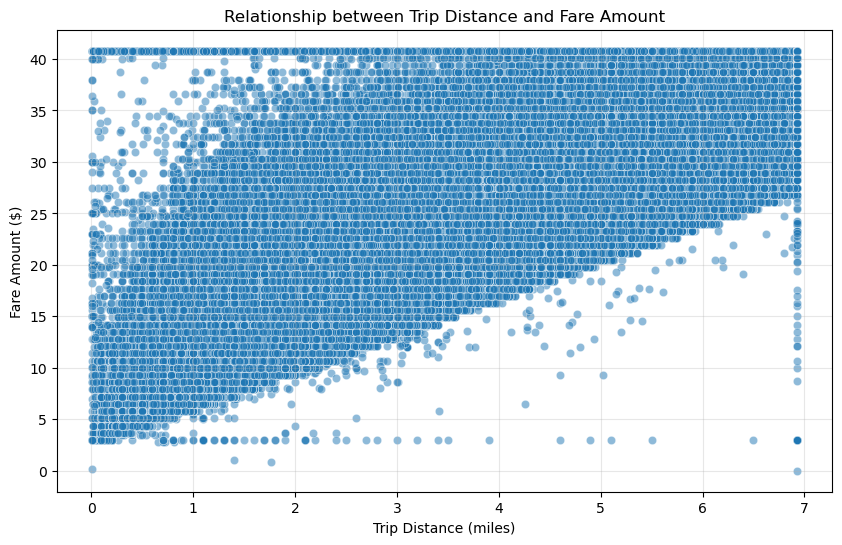

In [98]:
# Show how trip fare is affected by distance

df_trip = df_nonzero[df_nonzero['trip_distance'] > 0]
correlation = df_trip['trip_distance'].corr(df_trip['fare_amount'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_trip['trip_distance'], y=df_trip['fare_amount'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.grid(alpha=0.3)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

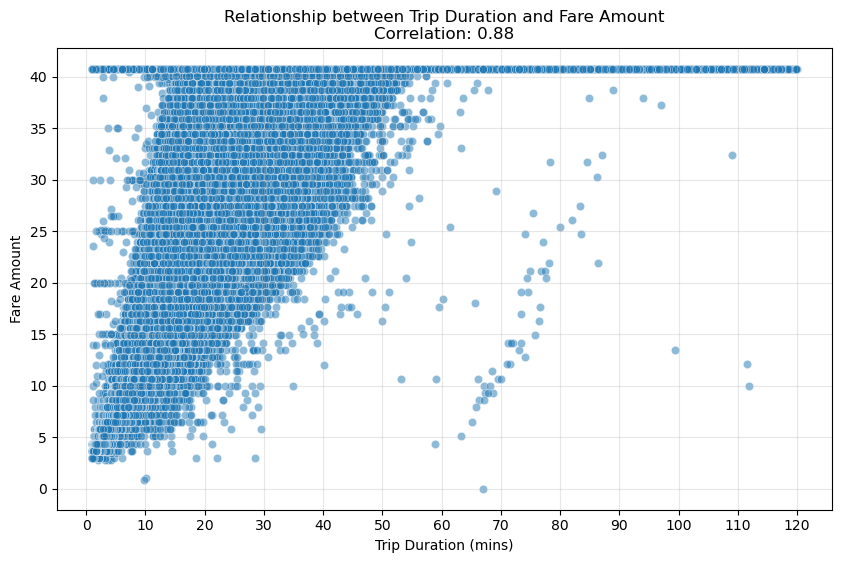

In [100]:
# Show relationship between fare and trip duration
df_trip.head()
df_trip['trip_duration'] = (df_trip['tpep_dropoff_datetime'] - df_trip.index).dt.total_seconds() / 60
df_trip['trip_duration'].value_counts()
df_tripClean = df_trip[(df_trip['trip_duration'] > 1) & (df_trip['trip_duration'] < 120)]
corr = df_tripClean['fare_amount'].corr(df_tripClean['trip_duration'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tripClean['trip_duration'], y=df_tripClean['fare_amount'], alpha=0.5)
plt.xticks(np.arange(0, 130, 10))
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Fare Amount')
plt.title(f'Relationship between Trip Duration and Fare Amount\nCorrelation: {corr:.2f}')
plt.grid(alpha=0.3)
plt.show()


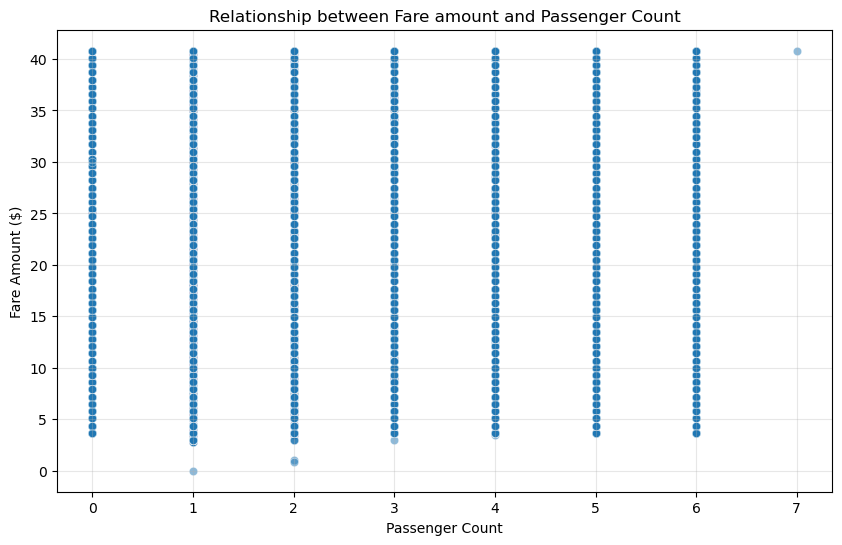

passenger_count
1.0    1377135
2.0     277284
3.0      69033
4.0      38532
0.0      29677
5.0      23871
6.0      15859
7.0          5
Name: count, dtype: int64

In [101]:
# Show relationship between fare and number of passengers
corre = df_tripClean['fare_amount'].corr(df_tripClean['passenger_count'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tripClean['passenger_count'], y=df_tripClean['fare_amount'], alpha=0.5)
plt.ylabel('Fare Amount ($)')
plt.xlabel('Passenger Count')
plt.title('Relationship between Fare amount and Passenger Count')
plt.grid(alpha=0.3)
plt.show()

df['passenger_count'].value_counts()


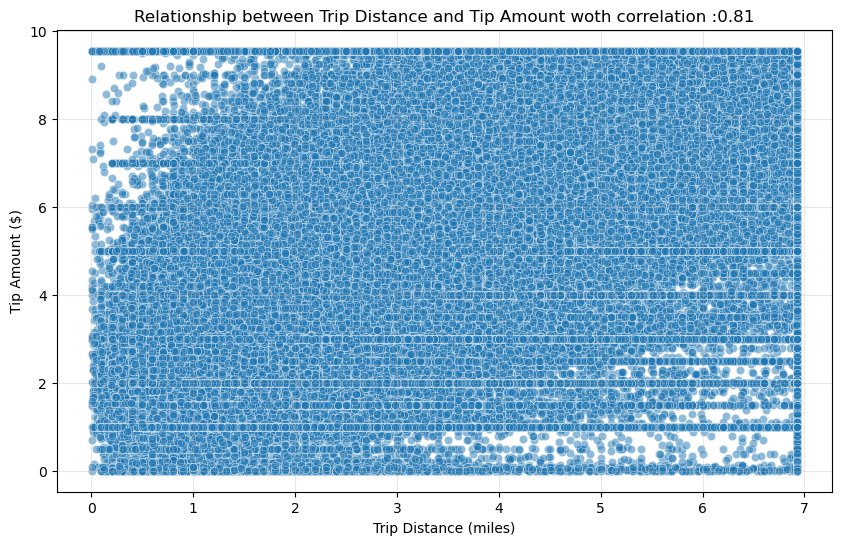

In [102]:
# Show relationship between tip and trip distance

correlationFact = df_tripClean['trip_distance'].corr(df_tripClean['tip_amount'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_tripClean['trip_distance'], y=df_tripClean['tip_amount'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.title(f'Relationship between Trip Distance and Tip Amount woth correlation :{correlationFact:.2f}')
plt.grid(alpha=0.3)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1410061
2         23
4         15
3          4
Name: count, dtype: int64


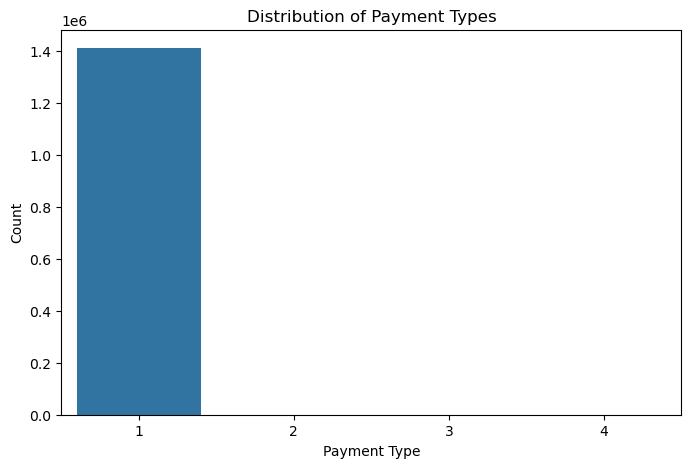

In [104]:
    # Analyse the distribution of different payment types (payment_type).

paymentCnts = df_tripClean["payment_type"].value_counts()
print(paymentCnts)
plt.figure(figsize=(8,5))
sns.barplot(x=paymentCnts.index, y=paymentCnts.values)
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [110]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [112]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
os.chdir(r"C:\Users\aa_la\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones")
zones = gpd.read_file("taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

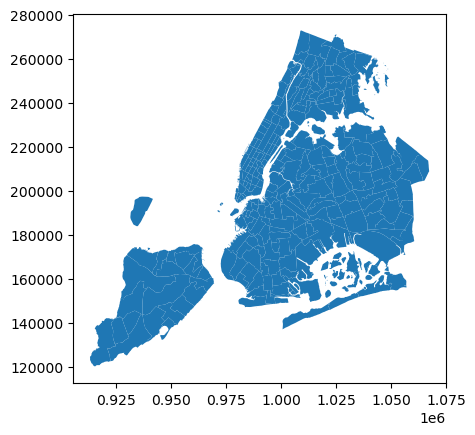

In [115]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [118]:
# Merge zones and trip records using locationID and PULocationID

df_merged = df_tripClean.merge(zones, left_on="PULocationID", right_on="LocationID")


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [120]:
# Group data by location and calculate the number of trips

trips = df_merged.groupby("PULocationID").size()
print(trips)


PULocationID
1         13
2          2
4       1399
6          1
7        250
       ...  
258        2
260       98
261     6892
262    19285
263    27848
Length: 220, dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [123]:
# Merge trip counts back to the zones GeoDataFrame

trips = trips.reset_index()
trips.columns = ["PULocationID", "Total_Trips"]

zones_merged = zones.merge(trips, left_on="LocationID", right_on="PULocationID")
zones_merged.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         4    0.043567    0.000112            Alphabet City           4   
3         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
4         7    0.107417    0.000390                  Astoria           7   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
3  Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
4         Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   

   PULocationID  Total_Trips  
0             1           13  
1             2            2  
2             4         1399  
3             6            1  
4             7          250

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

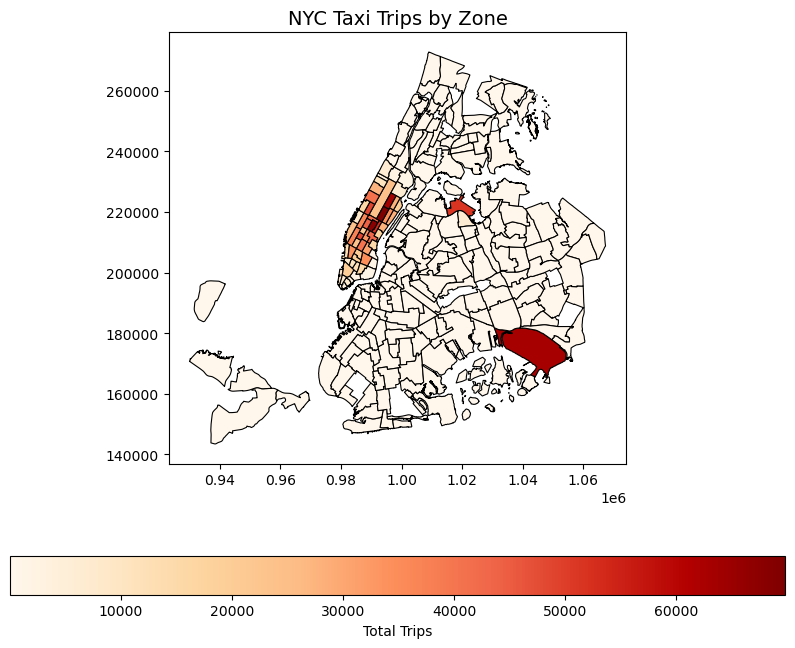

In [135]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(10,8))
zones_merged.plot(
    column="Total_Trips",  
    ax=ax,
    legend=True,
    cmap="OrRd",  
    linewidth=0.8,
    edgecolor="black",
    legend_kwds={"label": "Total Trips", "orientation": "horizontal"}
)
ax.set_title("NYC Taxi Trips by Zone", fontsize=14)

plt.show()


In [137]:
# can you try displaying the zones DF sorted by the number of trips?

sortedZns= zones_merged.sort_values(by="Total_Trips", ascending=False)
sortedZns.set_index('LocationID')

OBJECTID  Shape_Leng  Shape_Area                          zone  \
LocationID                                                                   
237              237    0.042213    0.000096         Upper East Side South   
161              161    0.035804    0.000072                Midtown Center   
236              236    0.044252    0.000103         Upper East Side North   
132              132    0.245479    0.002038                   JFK Airport   
162              162    0.035270    0.000048                  Midtown East   
...              ...         ...         ...                           ...   
208              208    0.214721    0.002020  Schuylerville/Edgewater Park   
240              240    0.146070    0.000722            Van Cortlandt Park   
253              253    0.036051    0.000078                 Willets Point   
248              248    0.056919    0.000150        West Farms/Bronx River   
251              251    0.137711    0.000626                   Westerleigh   

                  borough                                           geometry  \
LocationID                                                                     
237             Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
161             Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
236             Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
132                Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
162             Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
...                   ...                                                ...   
208                 Bronx  MULTIPOLYGON (((1032398.659 245606.037, 103240...   
240                 Bronx  POLYGON ((1018410.344 266056.29, 1018222.428 2...   
253                Queens  POLYGON ((1028825.348 218121.42, 1029152.461 2...   
248                 Bronx  POLYGON ((1021898.26 245357.487, 1022005.186 2...   
251         Staten Island  POLYGON ((947868.004 169247.734, 948000.981 16...   

            PULocationID  Total_Trips  
LocationID                             
237                  237        69769  
161                  161        67641  
236                  236        63606  
132                  132        63215  
162                  162        52616  
...                  ...          ...  
208                  208            1  
240                  240            1  
253                  253            1  
248                  248            1  
251                  251            1  

[221 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [160]:
# Find routes which have the slowest speeds at different times of the day
df_merged['tpep_dropoff_datetime'] = pd.to_datetime(df_merged['tpep_dropoff_datetime'])
df_merged['hour'] = df_merged['tpep_dropoff_datetime'].dt.hour
slowestRoutes = df_merged.groupby(['PULocationID', 'DOLocationID', 'hour']).agg(
    avgTripDtion=('trip_duration', 'mean'),  
    avgTripDst=('trip_distance', 'mean')
)

slowestRoutes['speed_mph'] = slowestRoutes['avgTripDst'] / (slowestRoutes['avgTripDtion'] / 60)
slowestRoutes = slowestRoutes.sort_values(by='speed_mph')
print(slowestRoutes.head()) 
print(slowestRoutes.tail())


                                avgTripDtion  avgTripDst  speed_mph
PULocationID DOLocationID hour                                     
45           45           11       50.433333        0.05   0.059484
48           184          2        65.666667        0.14   0.127919
193          193          11        4.000000        0.01   0.150000
71           71           14        2.066667        0.01   0.290323
1            1            11        1.950000        0.01   0.307692
                                avgTripDtion  avgTripDst   speed_mph
PULocationID DOLocationID hour                                      
260          145          21        7.700000       6.925   53.961039
223          138          4         1.083333       1.070   59.261538
1            1            16        6.716667       6.925   61.861042
17           17           5         2.616667       3.400   77.961783
134          216          19        2.616667       4.660  106.853503


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

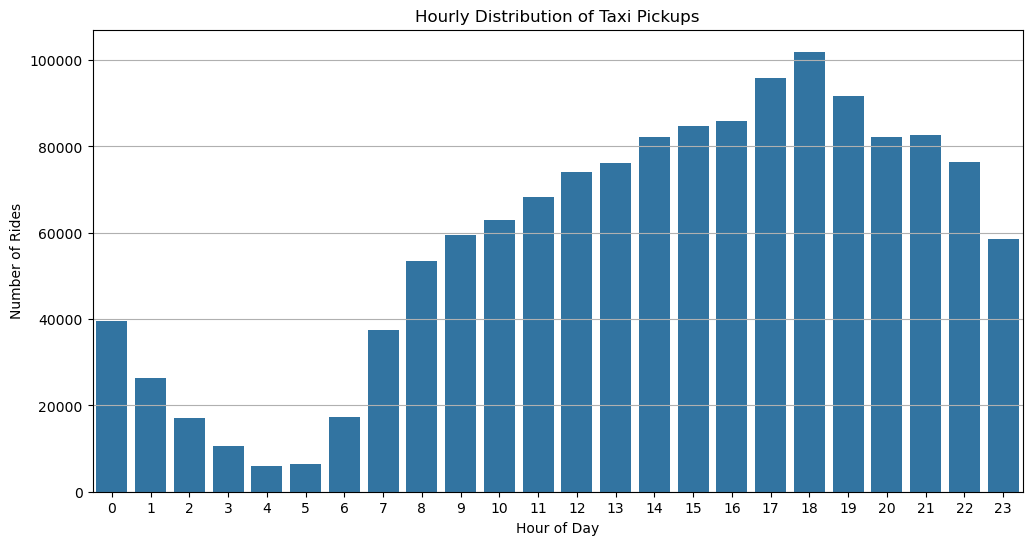

In [143]:
# Visualise the number of trips per hour and find the busiest hour

hourly_pickupsOfMerged = df_merged.groupby('pickup_hour').size()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickupsOfMerged.index, y=hourly_pickupsOfMerged.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xticks(range(24)) 
plt.grid(axis='y')
plt.show() 

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [168]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =

#18:00 (6 PM) - 101,962 pickups(rides)

#17:00 (5 PM) - 95,914 pickups(rides)

#19:00 (7 PM) - 91,810 pickups(rides)

#16:00 (4 PM) - 85,859 pickups(rides)

#15:00 (3 PM) - 84,760 pickups(rides)

df_merged["pickup_day"].value_counts()

pickup_day
3    222683
2    218821
4    205713
1    204803
5    200957
6    172766
0    172038
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

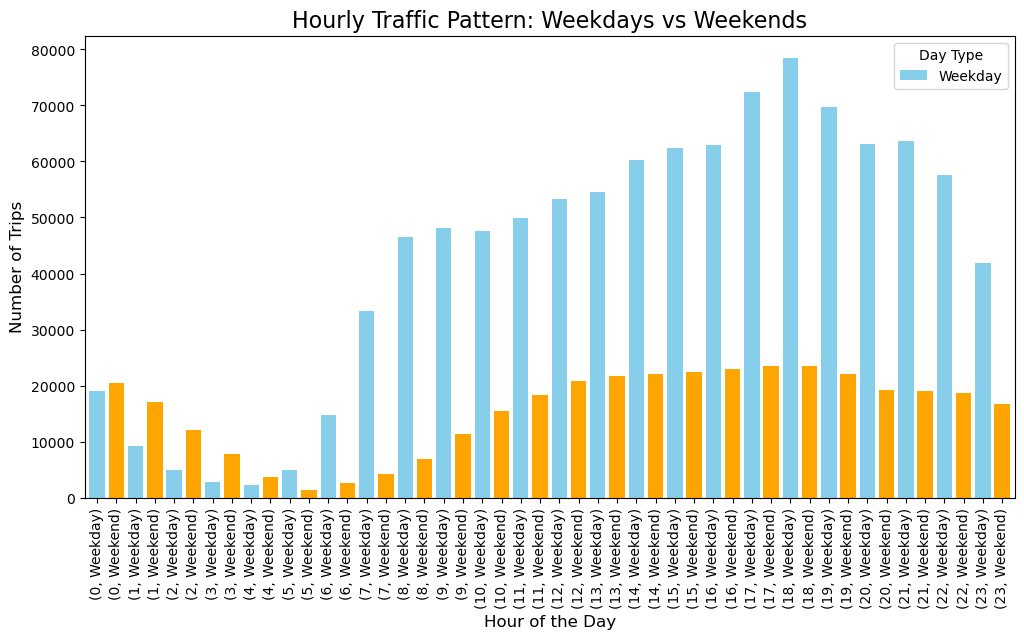

In [171]:
# Compare traffic trends for the week days and weekends

df_merged['day_type'] = df_merged['pickup_day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
tripsBy_hour_andDay_type = df_merged.groupby(['pickup_hour', 'day_type']).size()
plt.figure(figsize=(12, 6))
tripsBy_hour_andDay_type.plot(kind='bar', figsize=(12, 6), width=0.8, color=['skyblue', 'orange'])
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

     pickup_hour  PULocationID  num_pickups
0              0           132         2675
1              0           138         1216
2              0           142          904
3              0           161         1051
4              0           162          746
..           ...           ...          ...
235           23           170         1347
236           23           186         2030
237           23           230         2364
238           23           236          695
239           23           237         1407

[240 rows x 3 columns]
     dropoff_hour  DOLocationID  num_dropoffs
0               0            68          1156
1               0           141          1243
2               0           142           937
3               0           161           529
4               0           162           707
..            ...           ...           ...
235            23           170          1799
236            23           230          1207
237            23           236   

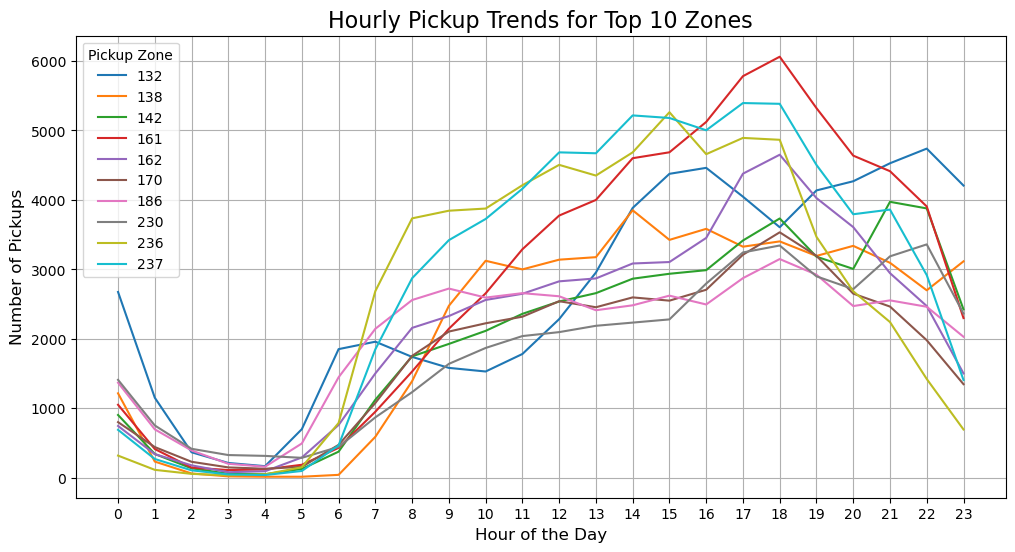

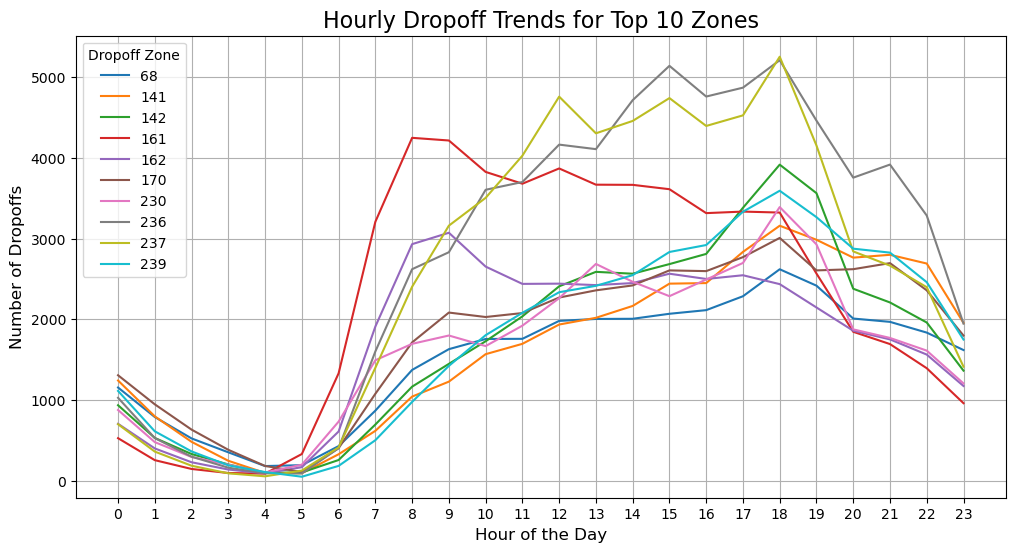

In [175]:
# Find top 10 pickup and dropoff zones

df_merged['dropoff_hour'] = df_merged['tpep_dropoff_datetime'].dt.hour
tpPickup_zones = df_merged.groupby('PULocationID').size().nlargest(10).index
tpDopoff_zones = df_merged.groupby('DOLocationID').size().nlargest(10).index
pickupTrnds = df_merged[df_merged['PULocationID'].isin(tpPickup_zones)].groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='num_pickups')
print(pickupTrnds)
dropoffTrnds = df_merged[df_merged['DOLocationID'].isin(tpDopoff_zones)].groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='num_dropoffs')
print(dropoffTrnds)

plt.figure(figsize=(12, 6))
sns.lineplot(data=pickupTrnds, x='pickup_hour', y='num_pickups', hue='PULocationID', palette='tab10')
plt.title('Hourly Pickup Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Pickup Zone')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=dropoffTrnds, x='dropoff_hour', y='num_dropoffs', hue='DOLocationID', palette='tab10')
plt.title('Hourly Dropoff Trends for Top 10 Zones', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Dropoffs', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Dropoff Zone')
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [177]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_cnts = df_merged.groupby('PULocationID').size().rename('num_pickups')
dropoff_cnts = df_merged.groupby('DOLocationID').size().rename('num_dropoffs')
zone_ratios = pd.concat([pickup_cnts, dropoff_cnts], axis=1).fillna(0)
zone_ratios['pickup_drop_ratio'] = zone_ratios['num_pickups'] / zone_ratios['num_dropoffs'].replace(0, np.nan)
highest_ratios = zone_ratios.nlargest(10, 'pickup_drop_ratio')
lowest_ratios = zone_ratios.nsmallest(10, 'pickup_drop_ratio')
print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(highest_ratios)
print("Top 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios)


Top 10 Zones with Highest Pickup/Dropoff Ratios:
     num_pickups  num_dropoffs  pickup_drop_ratio
70        6377.0         449.0          14.202673
132      63215.0       13066.0           4.838129
138      51533.0       17851.0           2.886841
186      48530.0       29337.0           1.654225
43       23882.0       17178.0           1.390267
114      19791.0       14304.0           1.383599
249      33844.0       25393.0           1.332808
162      52616.0       41222.0           1.276406
161      67641.0       55206.0           1.225247
100      21330.0       17427.0           1.223963
Top 10 Zones with Lowest Pickup/Dropoff Ratios:
    num_pickups  num_dropoffs  pickup_drop_ratio
3           0.0          52.0                0.0
5           0.0           5.0                0.0
15          0.0          86.0                0.0
22          0.0         109.0                0.0
23          0.0          21.0                0.0
27          0.0          20.0                0.0
30        

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [181]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

nightDf = df_merged[(df_merged['pickup_hour'] >= 23) | (df_merged['pickup_hour'] <= 5)]
toppickupZones = nightDf['PULocationID'].value_counts().head(10)
topdropoffZones = nightDf['DOLocationID'].value_counts().head(10)
print("Top 10 Pickup Zones During Night Hours:\n", toppickupZones)
print("\nTop 10 Dropoff Zones During Night Hours:\n", topdropoffZones)

Top 10 Pickup Zones During Night Hours:
 PULocationID
79     12821
249    10478
132     9481
48      8047
148     7986
114     7270
230     5873
186     5343
164     4773
138     4677
Name: count, dtype: int64

Top 10 Dropoff Zones During Night Hours:
 DOLocationID
79     6733
48     5083
170    5023
107    4835
68     4486
141    4464
263    4212
249    4118
239    3724
236    3675
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [184]:
# Filter for night hours (11 PM to 5 AM)
dayDf = df_merged[(df_merged['pickup_hour'] >= 6) & (df_merged['pickup_hour'] <= 22)]
nightRvn = nightDf['total_amount'].sum()
dayRvn = dayDf['total_amount'].sum()
totalRvn = nightRvn + dayRvn
print(totalRvn)
print((nightRvn / totalRvn) * 100)
print((dayRvn/ totalRvn) * 100)

36401856.58999999
12.05894968336834
87.94105031663165


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [188]:
# Analyse the fare per mile per passenger for different passenger counts

df_merged['fare_per_mile'] = df_merged['fare_amount'] / df_merged['trip_distance'].replace([np.inf, -np.inf], np.nan) 
df_merged['fare_per_mile_per_passenger'] = df_merged['fare_per_mile'] / df_merged['passenger_count']
farePerPass = df_merged.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print(farePerPass.replace([np.inf, -np.inf], 0.0) )

passenger_count
0.0    0.000000
1.0    8.019833
2.0    3.975319
3.0    2.667566
4.0    2.029795
5.0    1.545993
6.0    1.305918
7.0    0.841671
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [191]:
# Compare the average fare per mile for different days and for different times of the day
fareByHour = df_merged.groupby('pickup_hour')['fare_per_mile'].mean()
fareByDay = df_merged.groupby('pickup_day')['fare_per_mile'].mean()
print("Average Fare Per Mile by Hour:\n", fareByHour)
print("Average Fare Per Mile by Day:\n", fareByDay)

Average Fare Per Mile by Hour:
 pickup_hour
0     6.690042
1     6.638618
2     6.628876
3     6.503699
4     6.266076
5     6.404460
6     6.565301
7     7.165889
8     7.886696
9     8.163481
10    8.364028
11    8.719659
12    8.768354
13    8.671995
14    8.773831
15    8.742576
16    8.635486
17    8.524830
18    8.328533
19    8.312819
20    7.376103
21    7.127088
22    6.995451
23    6.943277
Name: fare_per_mile, dtype: float64
Average Fare Per Mile by Day:
 pickup_day
0    7.707904
1    8.314965
2    8.325905
3    8.352115
4    8.012323
5    7.801793
6    7.334912
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [194]:
# Compare fare per mile for different vendors
vendor_fareByHr = df_merged.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean()
print(vendor_fareByHr)

VendorID  pickup_hour
1         0              6.716019
          1              6.720590
          2              6.673932
          3              6.456294
          4              6.265532
          5              6.467003
          6              6.612496
          7              7.165368
          8              7.881428
          9              8.291484
          10             8.299090
          11             8.648377
          12             8.748048
          13             8.635822
          14             8.664504
          15             8.681681
          16             8.631231
          17             8.502245
          18             8.331714
          19             7.822474
          20             7.380450
          21             7.110398
          22             6.971108
          23             6.819307
2         0              6.682521
          1              6.614705
          2              6.615202
          3              6.517363
          4              6

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [197]:
# Defining distance tiers
shortDist = df_merged[df_merged['trip_distance'] <= 2].groupby('VendorID')['fare_per_mile'].mean()
print(shortDist)
mediumDist = df_merged[(df_merged['trip_distance'] > 2) & (df_merged['trip_distance'] <= 5)].groupby('VendorID')['fare_per_mile'].mean()
print(mediumDist)
longDist = df_merged[df_merged['trip_distance'] > 5].groupby('VendorID')['fare_per_mile'].mean()
print(longDist)

VendorID
1    9.377857
2    9.565011
Name: fare_per_mile, dtype: float64
VendorID
1    6.350174
2    6.530313
Name: fare_per_mile, dtype: float64
VendorID
1    5.528628
2    5.589728
Name: fare_per_mile, dtype: float64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

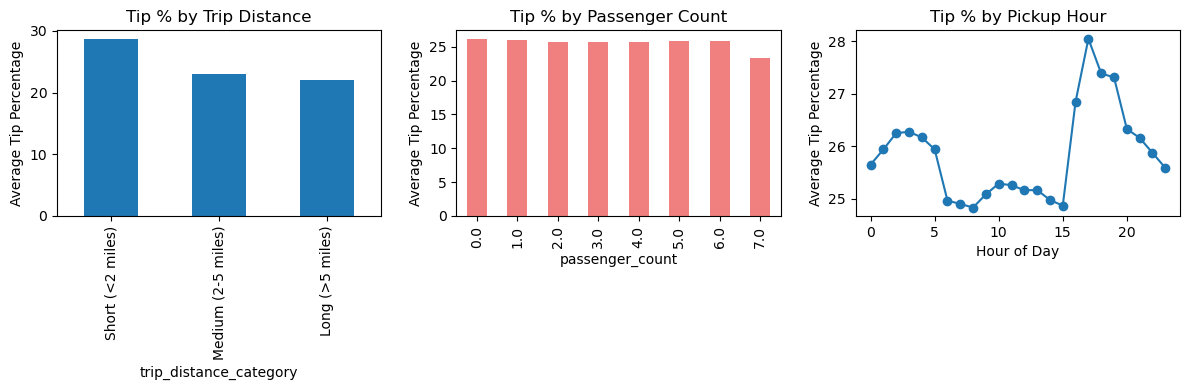

In [220]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_merged['tip_percentage'] = (df_merged['tip_amount'] / df_merged['fare_amount']) * 100

df_merged['trip_distance_category'] = pd.cut(df_merged['trip_distance'], bins=[0, 2, 5, float('inf')], labels=['Short (<2 miles)', 'Medium (2-5 miles)', 'Long (>5 miles)'])
tip_by_distance = df_merged.groupby('trip_distance_category')['tip_percentage'].mean()
tip_by_passenger = df_merged.groupby('passenger_count')['tip_percentage'].mean()
tip_by_hour = df_merged.groupby('pickup_hour')['tip_percentage'].mean()
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
tip_by_distance.plot(kind='bar')
plt.title("Tip % by Trip Distance")
plt.ylabel("Average Tip Percentage")
plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
tip_by_passenger.plot(kind='bar', color='lightcoral')
plt.title("Tip % by Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
tip_by_hour.plot(kind='line', marker='o')
plt.title("Tip % by Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Tip Percentage")

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [204]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

pickup_hour
0     1.415023
1     1.423252
2     1.434140
3     1.446053
4     1.413433
5     1.285223
6     1.238592
7     1.257869
8     1.266785
9     1.281170
10    1.323799
11    1.336365
12    1.349130
13    1.349168
14    1.357236
15    1.375378
16    1.369816
17    1.353056
18    1.340382
19    1.356835
20    1.367099
21    1.398203
22    1.406509
23    1.403689
Name: passenger_count, dtype: float64


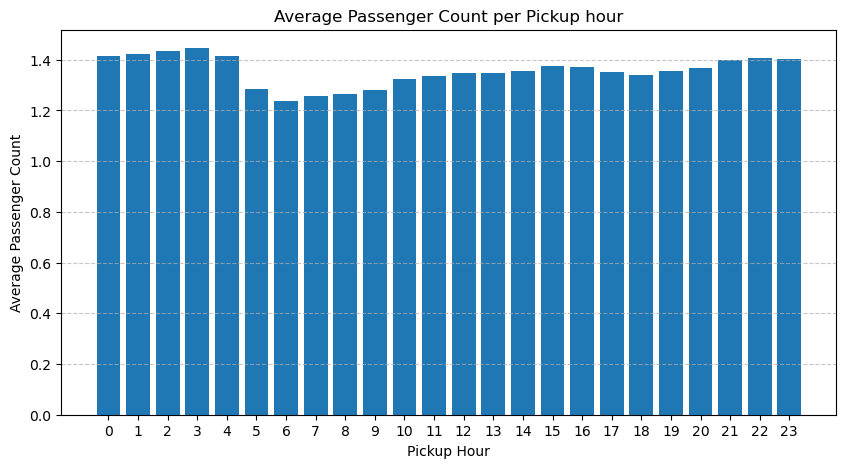

In [207]:
# See how passenger count varies across hours and days

passengerByHr = df_merged.groupby('pickup_hour')['passenger_count'].mean()
print(passengerByHr)
plt.figure(figsize=(10, 5))
plt.bar(passengerByHr.index.astype(str), passengerByHr.values)
plt.xlabel("Pickup Hour")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count per Pickup hour")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

PULocationID
178    6.000000
248    5.000000
6      3.000000
98     2.666667
47     2.500000
         ...   
208    1.000000
240    1.000000
235    1.000000
252    1.000000
251    1.000000
Name: passenger_count, Length: 220, dtype: float64
Index(['178', '248', '6', '98', '47', '175', '92', '56', '171', '20',
       ...
       '165', '205', '213', '212', '218', '208', '240', '235', '252', '251'],
      dtype='object', name='PULocationID', length=220)


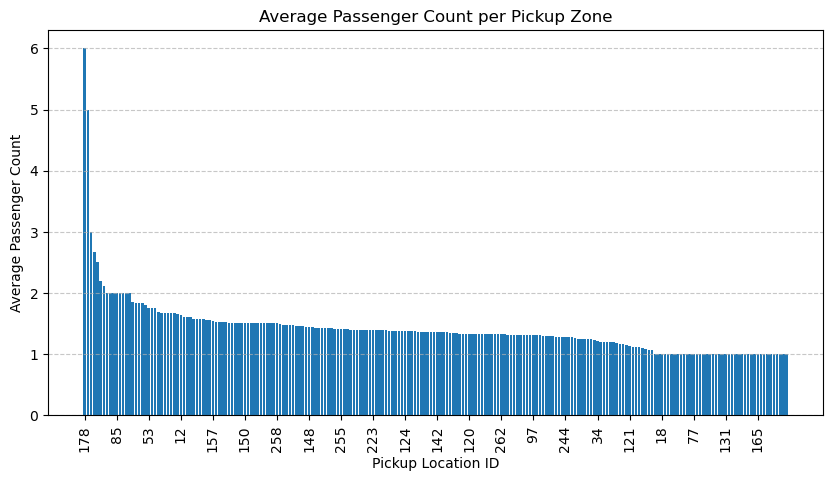

In [210]:
# How does passenger count vary across zones
passenger_by_zone = df_merged.groupby('PULocationID')['passenger_count'].mean().sort_values(ascending=False)
print(passenger_by_zone)
plt.figure(figsize=(10, 5))
plt.bar(passenger_by_zone.index.astype(str), passenger_by_zone.values)
plt.xlabel("Pickup Location ID")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count per Pickup Zone")
x_labels = passenger_by_zone.index.astype(str)
print(x_labels)
plt.xticks(np.arange(0, len(x_labels), step=10), x_labels[::10], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [211]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_mergedDf = zones_merged.merge(passenger_by_zone.rename("avg_passenger_count"), on="PULocationID")
zones_mergedDf.head()
print(zones_mergedDf[zones_mergedDf["PULocationID"] == 178])

     OBJECTID  Shape_Leng  Shape_Area                 zone  LocationID  \
146       178    0.068253    0.000176  Ocean Parkway South         178   

      borough                                           geometry  \
146  Brooklyn  POLYGON ((992354.462 167321.878, 992446.939 16...   

     PULocationID  Total_Trips  avg_passenger_count  
146           178            1                  6.0  


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

     PULocationID  congestion_surcharge
0               1              0.192308
1               2              2.500000
2               4              2.494639
3               6              0.000000
4               7              1.040000
..            ...                   ...
215           258              0.000000
216           260              1.198980
217           261              2.469893
218           262              2.495074
219           263              2.486265

[220 rows x 2 columns]
0        1
1        2
2        4
3        6
4        7
      ... 
215    258
216    260
217    261
218    262
219    263
Name: PULocationID, Length: 220, dtype: object


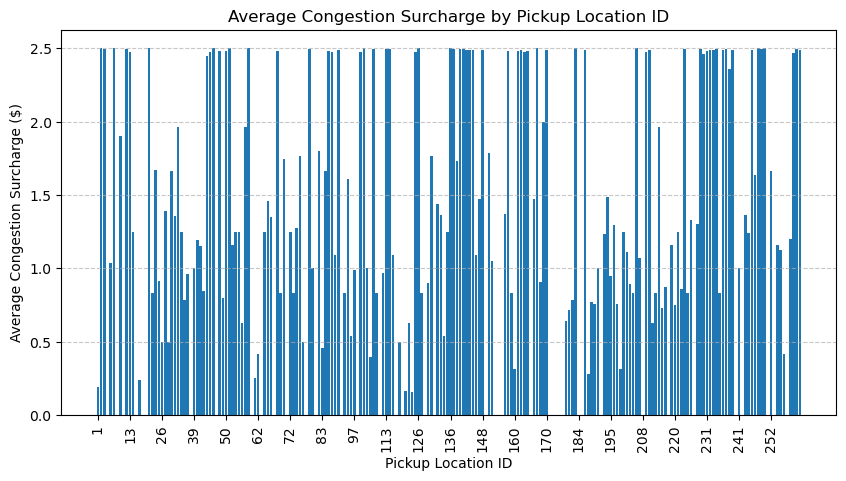

In [216]:
# How often is each surcharge applied?

avg_surcharge = df_merged.groupby("PULocationID")["congestion_surcharge"].mean().reset_index()
print(avg_surcharge)
zones_mergedDfCpy1 = zones_mergedDf.merge(avg_surcharge, on="PULocationID")
zones_mergedDfCpy1.head()
plt.figure(figsize=(10, 5))
plt.bar(avg_surcharge["PULocationID"].astype(str), avg_surcharge["congestion_surcharge"])
plt.xlabel("Pickup Location ID")
plt.ylabel("Average Congestion Surcharge ($)")
plt.title("Average Congestion Surcharge by Pickup Location ID")
x_labels = avg_surcharge["PULocationID"].astype(str)
print(x_labels)
plt.xticks(np.arange(0, len(x_labels), step=10), x_labels[::10], rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
#zones_mergedDfCpy = zones_mergedDf.merge(df_merged[['PULocationID', 'congestion_surcharge']], on='PULocationID')
## tried merging the two dataframes to get the analysis based on 

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## Analysis

1. From the general EDA, we can easily say from the graph hourly distribution of pickups that from 4pm to 7pm is the busiest time stating that majority people are using cabs as a daily commute perhaps.
2. From weekly distribution that thursdays are relatively high pickups compared to other days.
3. From monthly distribution, it is evident that may month has the highest noted pickups.
4. From the monthly revenue and quarterly revenue graphs, we can say that revenue is sky rocketed considering the holiday times and other reasons.
5. Based on the correlation between trip duration and fare_amount, we can see there is a strong correlation. Since most trips are short, consider incentivizing drivers to take them and use dynamic pricing at peak hours, busiest routes.
6. The vertical alignment of data in correlation graph of passenger_count and fareamount suggests that fare amount does not significantly vary with the number of passengers.This implies that the fare pricing model is likely based on trip distance or duration rather than the number of passengers.
7. The fare amounts for 1-6 passengers show a similar distribution, suggesting that additional passengers are not currently being charged extra.There could be an opportunity to introduce per-passenger fees for larger groups.
8. From relationship between trip distance and tip amount it is proven that longer trips generally receive higher tips, meaning drivers benefit from longer rides in terms of earnings.This suggests an opportunity to incentivize longer trips for both drivers and passengers.Since longer trips receive better tips, consider offering discounts on longer rides to encourage passengers to travel farther. As for short distance rides, Encourage multi-passenger trips to maximize efficiency per ride.
9. From Payment graph since nearly all transactions are digital, use real-time transaction data to optimize driver allocation. Identify peak usage times and locations where credit card transactions are highest and dispatch more vehicles accordingly
10. The busiest hours for taxi pickups are from 4 PM to 7 PM, with the highest number of trips recorded at 6 PM (101,962 rides).Increasing the number of available taxis in high-demand areas in manhattan areas during these peak hours will improve operational efficiency


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Locations like Zone 79, Zone 249, and Zone 132 experience high night-time activity.
2. Locations like  Zones 45, 48, and 193 during peak hours are experienced as the slowest routes.
3. Deploying more taxis in high-demand zones and avoid areas with known slow-moving traffic unless necessary will improve operational efficiency
4. The peak demand for pickups occurs between 16:00 - 19:00, with the highest at 18:00.So More cabs should be available in high pickup zones (that means 132, 138, 142, 161, 170) during this window to reduce passenger wait times.
5. The drop-off trends show a sharp rise from 6:00 - 9:00 AM, indicating a commuter-heavy time slot.More cabs should be positioned near pickup zones and drop-off zones.Strategic placement in high drop-off zones like 68, 141, 142, and 170 would optimize utilization.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Long trips yield higher tips, so encouraging them through discounted fares could increase overall earnings.
2. Short trips should be optimized for shared rides to improve efficiency.
3. Since most payments are done via credit card, increase cabs in areas where cash transactions are minimal to streamline operations.
4. The fare per mile peaks during mid-morning (9 AM - 12 PM) and evening hours (4 PM - 7 PM).Increasing the availability of taxis during these hours can capture maximum revenue.
5. Trips within <2 miles generate the highest fare per mile.Incentivize short-distance trips in high-traffic areas to optimize per-mile revenue.
6. Increase base fare for short trips (<2 miles) where the fare per mile is high to optimize earnings. Maintain or slightly reduce fares for long trips (>5 miles) to stay competitive
7. Apply time-based surge pricing during high-demand hours (morning/evening peak) to maximize revenue.
8. Vendor 2 generally has a higher fare per mile than Vendor 1. Vendor 1 could align its pricing structure to remain competitive.